In [1]:
import pyanitools as pyt
import pyaniasetools as aat
import hdnntools as hdt
import numpy as np

import matplotlib.pyplot as plt
import aniensemblestats as ens

/scratch/Anaconda/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


van Der Waals correction will be unavailable. Please install ased3


In [2]:
#h5files = '/home/jujuman/Research/DataReductionMethods/modelCNOSFCl/initial/cv1/testset/testset1.h5'
#h5files = '/home/jujuman/Seagate2TB/Research/ANI-DATASET/h5data/ani_data_c10test.h5'
#h5files = '/home/jujuman/Research/extensibility_test_sets/gdb-10/gdb11_10_test500.h5'
h5files = '/nh/nest/u/jsmith/Research/train_qm7/train/testset/testset0.h5'

#wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
#wkdir = '/home/jujuman/Research/DataReductionMethods/train_test/ANI-9.0.4_netarch7/'
wkdir = '/nh/nest/u/jsmith/Research/train_qm7/train/'
#wkdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/ANI-AL-0707.0000.0401'
#cnstfile = wkdir + '/train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
#saefile  = wkdir + '/train0/sae_wb97x-631gd.dat'

cnstfile = wkdir + '/rHCNOS-5.0R_16-3.4A_a4-8.params'
saefile  = wkdir + '/sae_linfit.dat'
nnfdir   = wkdir + '/train'
Nn = 1

In [3]:
# Define the conformer cross validator class
anicv = aat.anicrossvalidationconformer(cnstfile,saefile,nnfdir,Nn,1,False)

In [4]:
adl = pyt.anidataloader(h5files)

In [5]:
Eani_t = []
Edft_t = []
for data in adl:
    X = data['coordinates']
    S = data['species']
    Edft = hdt.hatokcal*data['energies'][0]
   
    #Fdft = data['forces']

    #if 'N' in S:
    Eani = anicv.compute_energy_conformations(X=X,S=S)
    Eani = np.asarray(np.mean(Eani,axis=0))
    #print(Eani,Edft)
    #idx = np.where((Edft - Edft.min() < 300.0))
    #print(np.abs(Edft-Eani), len(S))
    
    #mina = Eani.min()
    #mind = Edft.min()
    
    Eani_t.append(Eani)
    Edft_t.append(Edft)
    #print(np.abs(-Fani[0]-hdt.hatokcal*Fdft))

Eani_t = np.asarray(Eani_t)
Edft_t = np.asarray(Edft_t)

In [6]:
print(hdt.calculaterootmeansqrerror(Eani_t,Edft_t))
print(hdt.calculatemeanabserror(Eani_t,Edft_t))
print(Eani_t.size)

1.8696618305497066
1.2806159586888628
754


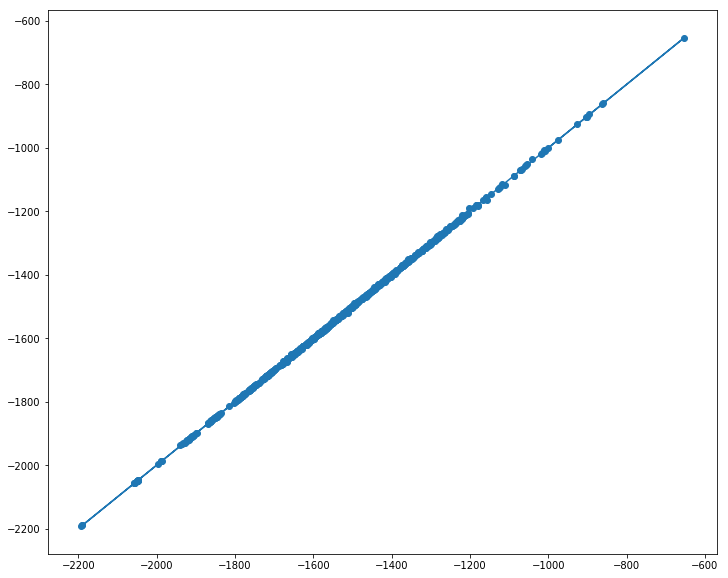

In [7]:
fig = plt.figure(figsize=[12,10])
plt.plot(Edft_t,Edft_t)
plt.scatter(Eani_t,Edft_t)
plt.show()

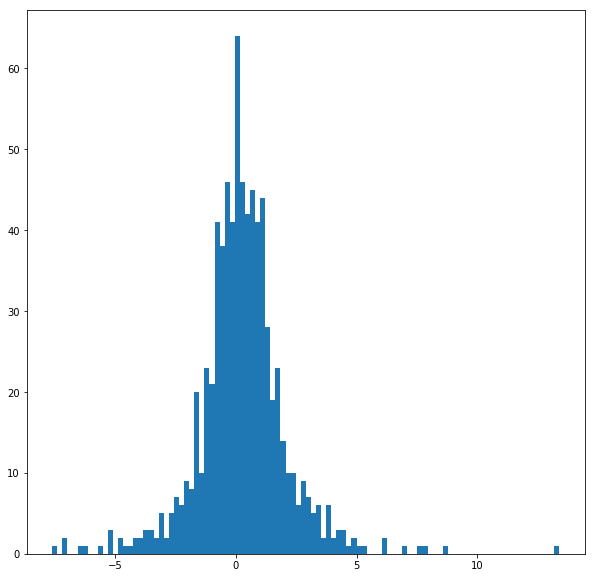

In [8]:
fig = plt.figure(figsize=[10,10])
plt.hist(Edft_t-Eani_t,bins=100)
plt.show()